In [ ]:
# GREENPULSE — ML Modeling and Evaluation Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

In [2]:
# 1️ Load Preprocessed Dataset
data = pd.read_csv("feature_engineered_greenpulse.csv")

print("Dataset Loaded Successfully")
print("Shape:", data.shape)
print("Columns:", list(data.columns))


Dataset Loaded Successfully
Shape: (5616, 35)
Columns: ['country', 'subnational1', 'threshold', 'area_ha', 'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2020_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2002', 'tc_loss_ha_2003', 'tc_loss_ha_2004', 'tc_loss_ha_2005', 'tc_loss_ha_2006', 'tc_loss_ha_2007', 'tc_loss_ha_2008', 'tc_loss_ha_2009', 'tc_loss_ha_2010', 'tc_loss_ha_2011', 'tc_loss_ha_2012', 'tc_loss_ha_2013', 'tc_loss_ha_2014', 'tc_loss_ha_2015', 'tc_loss_ha_2016', 'tc_loss_ha_2017', 'tc_loss_ha_2018', 'tc_loss_ha_2019', 'tc_loss_ha_2020', 'tc_loss_ha_2021', 'tc_loss_ha_2022', 'tc_loss_ha_2023', 'extent_change_2000_2010', 'total_tree_loss_ha_2001_2023', 'gain_loss_ratio', 'GDI', 'GDI_Category']


In [3]:
# 2️ Define Features and Target

target = "GDI"

X = data.select_dtypes(include=np.number).drop(columns=[target], errors="ignore")
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (4492, 33)
Testing data shape: (1124, 33)


In [ ]:
# 3️ REGRESSION MODELS (Predicting GDI)
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42, n_estimators=100)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Regression Evaluation
print("\nREGRESSION RESULTS:\n")
print("Linear Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.3f}\n")

print("Random Forest Regressor:")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.3f}\n")


REGRESSION RESULTS:

Linear Regression:
R² Score: 0.303
MAE: 57.211
MSE: 31310.264

Random Forest Regressor:
R² Score: 0.984
MAE: 3.148
MSE: 718.425




CLASSIFICATION RESULTS:

Logistic Regression:
Accuracy: 0.8834519572953736
Precision: 0.8835621163235498
Recall: 0.8834519572953736
F1: 0.8811697908295503

Random Forest Classifier:
Accuracy: 0.9813167259786477
Precision: 0.9812092270452266
Recall: 0.9813167259786477
F1: 0.9812150976112133


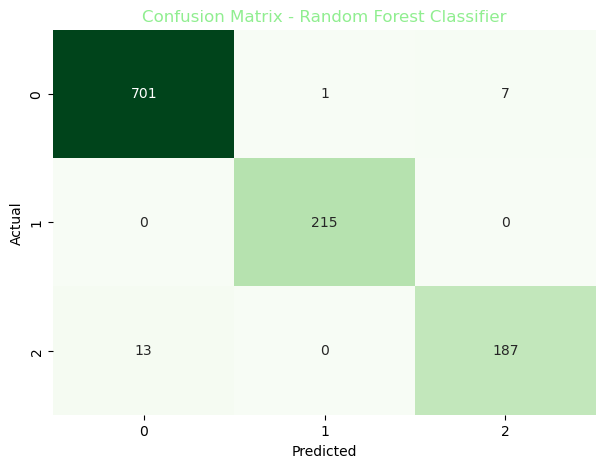

In [ ]:
# 4️ CLASSIFICATION MODELS (Categorizing GDI)
# Create categorical target
def categorize_gdi(value):
    if value <= -5:
        return "Excellent (Net Gain)"
    elif -5 < value <= 0:
        return "Acceptable"
    elif 0 < value <= 10:
        return "Concerning"
    else:
        return "High-Risk"

data["GDI_Category"] = data["GDI"].apply(categorize_gdi)

y_class = data["GDI_Category"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_c)
X_test_scaled = scaler.transform(X_test_c)

# Logistic Regression
log_clf = LogisticRegression(max_iter=2000, random_state=42)
log_clf.fit(X_train_scaled, y_train_c)
y_pred_log = log_clf.predict(X_test_scaled)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_c, y_train_c)
y_pred_rf_clf = rf_clf.predict(X_test_c)

# Classification Evaluation
print("\nCLASSIFICATION RESULTS:\n")

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_log))
print("Precision:", precision_score(y_test_c, y_pred_log, average='weighted'))
print("Recall:", recall_score(y_test_c, y_pred_log, average='weighted'))
print("F1:", f1_score(y_test_c, y_pred_log, average='weighted'))

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_rf_clf))
print("Precision:", precision_score(y_test_c, y_pred_rf_clf, average='weighted'))
print("Recall:", recall_score(y_test_c, y_pred_rf_clf, average='weighted'))
print("F1:", f1_score(y_test_c, y_pred_rf_clf, average='weighted'))

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_rf_clf)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier", color='lightgreen')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

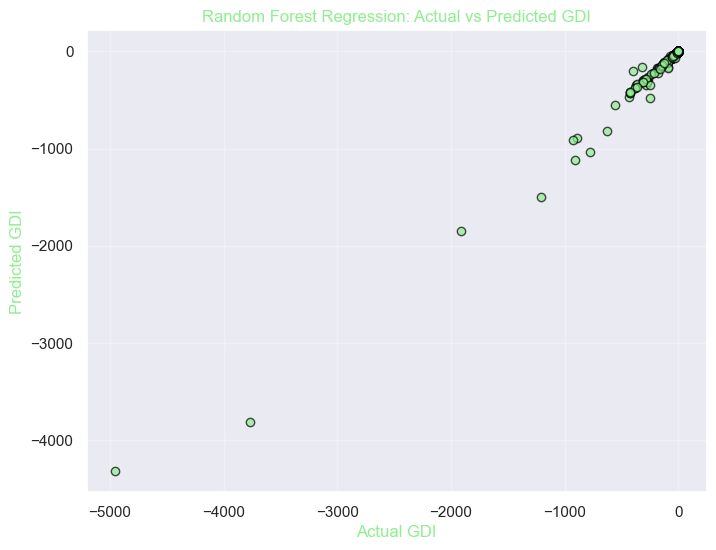

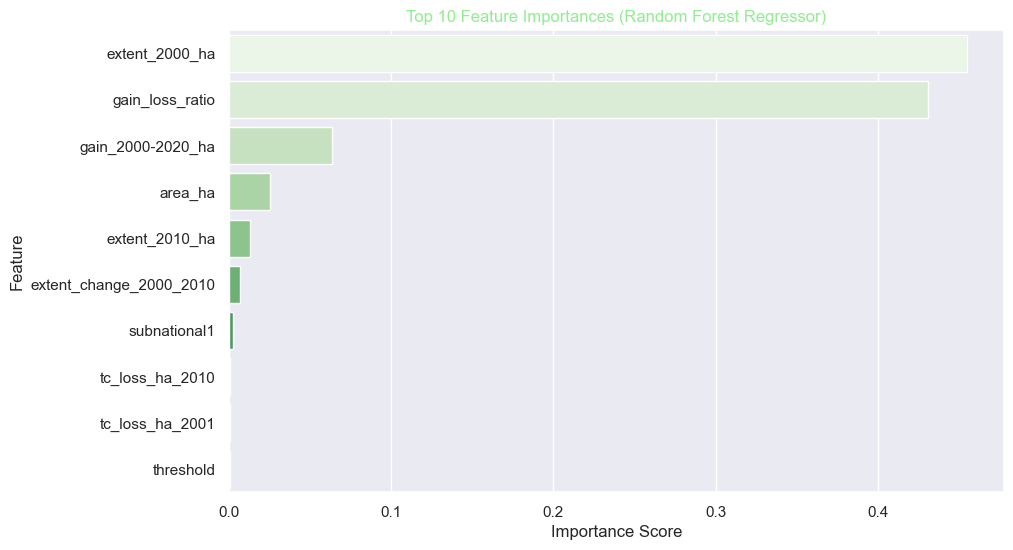

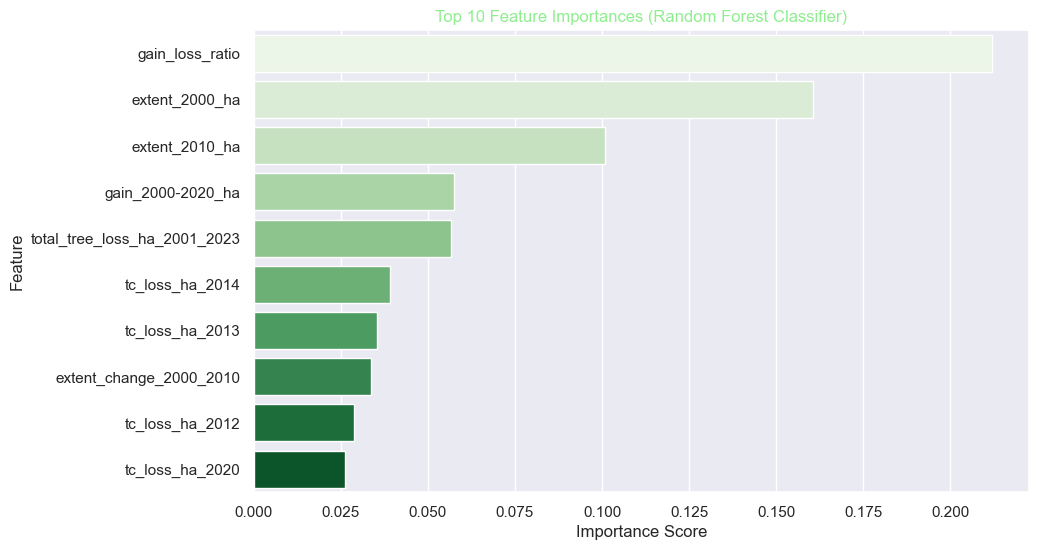

In [6]:
# 5️ VISUALIZATIONS
sns.set_theme(style="darkgrid", palette="dark:#004d00")

# Regression: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color='lightgreen', edgecolor='black', alpha=0.7)
plt.xlabel("Actual GDI", color='lightgreen')
plt.ylabel("Predicted GDI", color='lightgreen')
plt.title("Random Forest Regression: Actual vs Predicted GDI", color='lightgreen')
plt.grid(alpha=0.3)
plt.show()

#Feature Importance (Regression)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances[:10], y=importances.index[:10], palette="Greens")
plt.title("Top 10 Feature Importances (Random Forest Regressor)", color='lightgreen')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

#Feature Importance (Classification)
importances_clf = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances_clf[:10], y=importances_clf.index[:10], palette="Greens")
plt.title("Top 10 Feature Importances (Random Forest Classifier)", color='lightgreen')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
# 6️ MODEL PERFORMANCE COMPARISON

regression_metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor"],
    "R² Score": [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)],
    "MAE": [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_rf)],
    "MSE": [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_rf)]
})
regression_metrics

classification_metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest Classifier"],
    "Accuracy": [accuracy_score(y_test_c, y_pred_log), accuracy_score(y_test_c, y_pred_rf_clf)],
    "Precision": [precision_score(y_test_c, y_pred_log, average='weighted'),
                  precision_score(y_test_c, y_pred_rf_clf, average='weighted')],
    "Recall": [recall_score(y_test_c, y_pred_log, average='weighted'),
               recall_score(y_test_c, y_pred_rf_clf, average='weighted')],
    "F1 Score": [f1_score(y_test_c, y_pred_log, average='weighted'),
                 f1_score(y_test_c, y_pred_rf_clf, average='weighted')]
})
classification_metrics


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.883452,0.883562,0.883452,0.881170
1,Random Forest Classifier,0.981317,0.981209,0.981317,0.981215


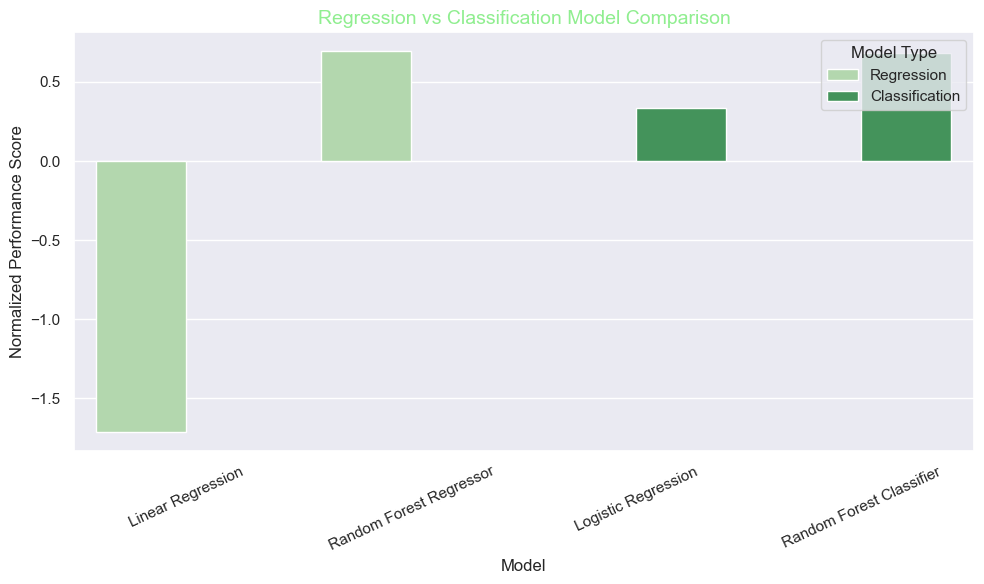


Combined Regression & Classification Performance:


,Model,Type,Performance,Normalized Performance
0,Linear Regression,Regression,0.302845,-1.714207
1,Random Forest Regressor,Regression,0.984004,0.693018
2,Logistic Regression,Classification,0.883452,0.337667
3,Random Forest Classifier,Classification,0.981317,0.683522


In [9]:
# 7️ COMBINED PERFORMANCE VISUALIZATION

combined_eval = []

for _, metrics in regression_metrics.iterrows():
    combined_eval.append({"Model": metrics["Model"], "Type": "Regression", "Performance": metrics["R² Score"]})
for _, metrics in classification_metrics.iterrows():
    combined_eval.append({"Model": metrics["Model"], "Type": "Classification", "Performance": metrics["Accuracy"]})

combined_eval_df = pd.DataFrame(combined_eval)

scaler = StandardScaler()
combined_eval_df["Normalized Performance"] = scaler.fit_transform(combined_eval_df[["Performance"]])

plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Normalized Performance", hue="Type", data=combined_eval_df, palette="Greens")
plt.title("Regression vs Classification Model Comparison", color="lightgreen", fontsize=14)
plt.ylabel("Normalized Performance Score")
plt.xticks(rotation=25)
plt.legend(title="Model Type", loc="upper right")
plt.tight_layout()
plt.show()

print("\nCombined Regression & Classification Performance:")
display(combined_eval_df)

 TESTING: REGRESSION MODEL 

Sample Regression Predictions (GDI):
   Actual_GDI  Predicted_GDI
0    0.053505       0.051691
1   -1.256926      -1.340783
2   -0.255549      -0.265319
3    0.065740       0.058160
4   -2.857319      -2.729657


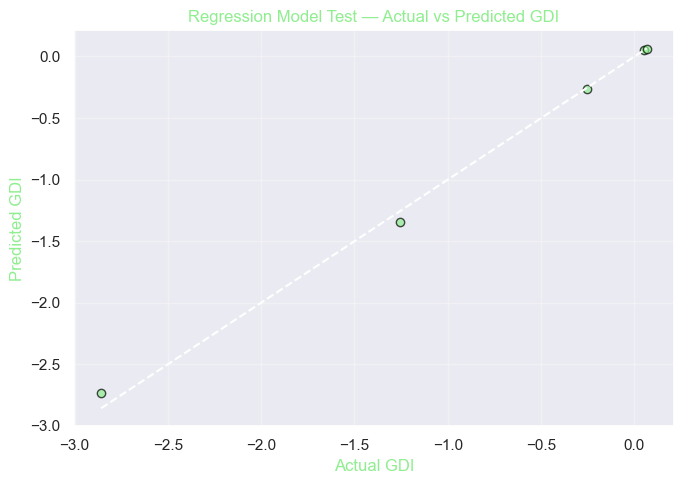

In [10]:
#  MODEL TESTING & VALIDATION SECTION

import joblib
# 1️ Test the Regression Model

print(" TESTING: REGRESSION MODEL ")

# Select random unseen samples from test set
sample_reg = X_test.sample(5, random_state=42)
actual_reg = y_test.loc[sample_reg.index]

# Predict GDI values
pred_reg = rf.predict(sample_reg)

# Combine results
reg_results = pd.DataFrame({
    "Actual_GDI": actual_reg.values,
    "Predicted_GDI": pred_reg
}).reset_index(drop=True)

print("\nSample Regression Predictions (GDI):")
print(reg_results)

# Scatterplot: Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(actual_reg, pred_reg, color="lightgreen", edgecolor="black", alpha=0.7)
plt.plot([actual_reg.min(), actual_reg.max()],
         [actual_reg.min(), actual_reg.max()], color="white", linestyle="--")
plt.title("Regression Model Test — Actual vs Predicted GDI", color="lightgreen")
plt.xlabel("Actual GDI", color="lightgreen")
plt.ylabel("Predicted GDI", color="lightgreen")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


 TESTING: CLASSIFICATION MODEL 

Sample Classification Predictions (GDI Category):
  Actual_Category Predicted_Category
0      Acceptable         Acceptable
1      Acceptable         Acceptable
2      Concerning         Concerning
3      Acceptable         Acceptable
4      Acceptable         Acceptable


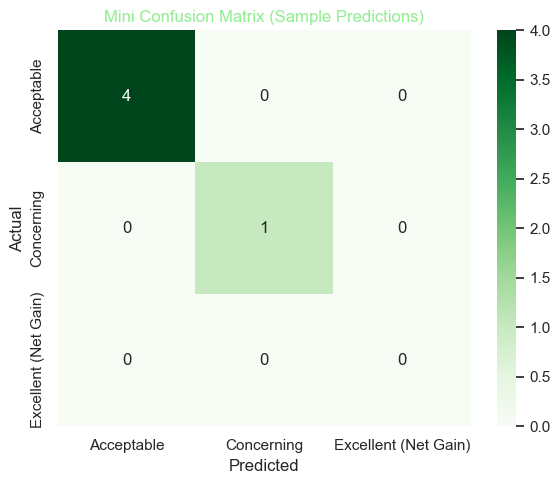

In [11]:
# 2️ Test the Classification Model
print(" TESTING: CLASSIFICATION MODEL ")
# Random samples for classification test
sample_class = X_test_c.sample(5, random_state=24)
actual_class = y_test_c.loc[sample_class.index]

# Predict categories
pred_class = rf_clf.predict(sample_class)

# Combine results
class_results = pd.DataFrame({
    "Actual_Category": actual_class.values,
    "Predicted_Category": pred_class
}).reset_index(drop=True)

print("\nSample Classification Predictions (GDI Category):")
print(class_results)

# Confusion Matrix Visualization for these 5 predictions
cm_small = confusion_matrix(actual_class, pred_class, labels=rf_clf.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm_small, annot=True, fmt="d", cmap="Greens", xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title("Mini Confusion Matrix (Sample Predictions)", color="lightgreen")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [12]:
# 3️ Model Confidence Check

print(" MODEL CONFIDENCE CHECK ")

# Get probabilities for the 5 samples
proba = rf_clf.predict_proba(sample_class)
proba_df = pd.DataFrame(proba, columns=rf_clf.classes_)
proba_df.index = sample_class.index
print("\nPrediction Probabilities for Each Category:")
print(proba_df.round(3))


 MODEL CONFIDENCE CHECK 

Prediction Probabilities for Each Category:
      Acceptable  Concerning  Excellent (Net Gain)
3832        1.00         0.0                  0.00
2600        0.98         0.0                  0.02
501         0.00         1.0                  0.00
4541        0.98         0.0                  0.02
1961        1.00         0.0                  0.00


In [13]:
# 4️ Testing on New (Unseen) Data

print(" TESTING: NEW DATA SAMPLE ")


# Example simulated city data (you can change values)
city_data = pd.DataFrame([{
    "area_ha": 45000,
    "extent_2000_ha": 38500,
    "extent_2010_ha": 36500,
    "gain_2000-2020_ha": 220,
    "tc_loss_ha_2023": 180
}])

# Align columns with training features
city_data = city_data.reindex(columns=X.columns, fill_value=0)

# Predict GDI value and category
pred_gdi = rf.predict(city_data)[0]
pred_cat = rf_clf.predict(city_data)[0]

print(f"\nPredicted GDI for new city: {pred_gdi:.3f}")
print(f"Predicted Risk Category: {pred_cat}")


 TESTING: NEW DATA SAMPLE 

Predicted GDI for new city: 0.080
Predicted Risk Category: Acceptable


In [15]:
# 5️ Save Models for Future Use

print(" SAVING TRAINED MODELS ")


joblib.dump(rf, "random_forest_regressor.pkl")
joblib.dump(rf_clf, "random_forest_classifier.pkl")

print("Models saved as:")
print(" - random_forest_regressor.pkl")
print(" - random_forest_classifier.pkl")


 SAVING TRAINED MODELS 
Models saved as:
 - random_forest_regressor.pkl
 - random_forest_classifier.pkl
